In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/File_Data /online_retail_II.csv')

In [4]:
# Melihat 5 Data Teratas
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
# Melihat Type Data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [6]:
# Mencari Data Duplikat
df.duplicated().sum()

34335

In [7]:
# Menghapus Data Duplikat
df = df.drop_duplicates()
df.duplicated().sum()

0

In [8]:
#Melihat Banyaknya keberagaman data 
df.select_dtypes(include='object').nunique()

Invoice        53628
StockCode       5305
Description     5698
InvoiceDate    47635
Country           43
dtype: int64

In [9]:
df.select_dtypes(exclude='object').nunique()

Quantity       1057
Price          2807
Customer ID    5942
dtype: int64

In [10]:
# Mengganti type data
df["date"] = pd.to_datetime(df["InvoiceDate"])
df["Customer ID"] = df["Customer ID"].astype("str")

In [11]:
# Penambahan kolom date
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01 07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01 07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01 07:45:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01 07:45:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01 07:45:00


In [12]:
# Penambahan kolom date
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1033036 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1033036 non-null  object        
 1   StockCode    1033036 non-null  object        
 2   Description  1028761 non-null  object        
 3   Quantity     1033036 non-null  int64         
 4   InvoiceDate  1033036 non-null  object        
 5   Price        1033036 non-null  float64       
 6   Customer ID  1033036 non-null  object        
 7   Country      1033036 non-null  object        
 8   date         1033036 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 78.8+ MB


In [13]:
# Mengecheck banyaknya nilai null
df.isnull().sum()

Invoice           0
StockCode         0
Description    4275
Quantity          0
InvoiceDate       0
Price             0
Customer ID       0
Country           0
date              0
dtype: int64

In [14]:
# Membuang baris null
df_final = df[df.Description.notnull()]
df_final

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01 07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01 07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01 07:45:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01 07:45:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01 07:45:00
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09 12:50:00
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09 12:50:00
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09 12:50:00
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-09 12:50:00


In [15]:
# Statistic descriptive
df_final.describe()

,Quantity,Price
count,1.028761e+06,1.028761e+06
mean,1.019092e+01,4.633153e+00
std,1.723738e+02,1.226512e+02
min,-8.099500e+04,-5.359436e+04
25%,1.000000e+00,1.250000e+00
50%,3.000000e+00,2.100000e+00
75%,1.000000e+01,4.150000e+00
max,8.099500e+04,3.897000e+04


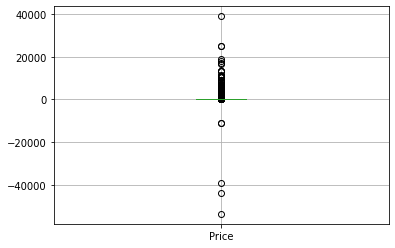

In [16]:
# Melihat outlier
df_final[["Price"]].boxplot()

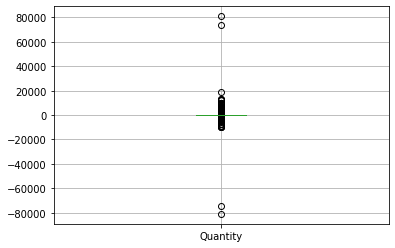

In [17]:
# Melihat outlier
df_final[["Quantity"]].boxplot()

In [18]:
# remove outllers
def remove_outlier(df_in,col_name):
  q1 = df_in[col_name].quantile(0.25)
  q3 = df_in[col_name].quantile(0.75)
  iqr = q3-q1 #Interquartile range
  fence_low = q1 - 1.5*iqr
  fence_high = q3 + 1.5*iqr
  df_out = df_in.loc[(df_in[col_name] > fence_low)& (df_in[col_name] < fence_high)]
  return df_out

,Price
count,950729.000000
mean,2.570012
std,1.928091
min,0.000000
25%,1.250000
50%,1.950000
75%,3.750000
max,8.490000


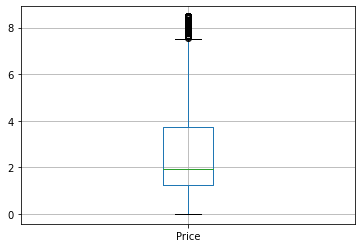

In [19]:
df_P_out = remove_outlier(df_final, "Price")
remove_outlier(df_final, "Price")[["Price"]].boxplot()
remove_outlier(df_final, "Price")[["Price"]].describe()

,Quantity
count,916391.000000
mean,4.585915
std,4.523197
min,-12.000000
25%,1.000000
50%,3.000000
75%,6.000000
max,23.000000


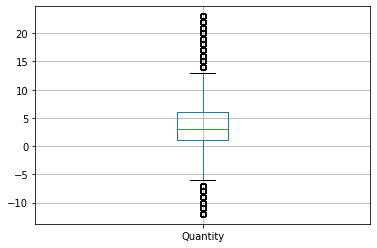

In [20]:
df_Q_out = remove_outlier(df_final, "Quantity")
remove_outlier(df_final, "Quantity")[["Quantity"]].boxplot()
remove_outlier(df_final, "Quantity")[["Quantity"]].describe()

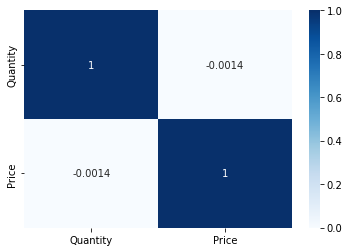

In [21]:
# Melihat kecocokan data
corr = df_final.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

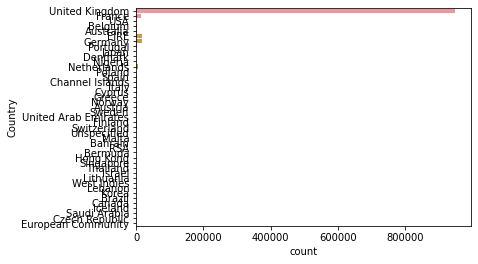

In [22]:
# Banyaknya pembagian data use case country
sns.countplot(y='Country', data=df)
plt.show()

In [23]:
# Banyaknya item (Description)
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    5740
REGENCY CAKESTAND 3 TIER              4295
JUMBO BAG RED RETROSPOT               3388
ASSORTED COLOUR BIRD ORNAMENT         2868
PARTY BUNTING                         2730
                                      ... 
SPOTTY CAT DOORSTOP                      1
SET OF 4 KNICK KNACK TINS  DOILEY        1
Dagamed                                  1
SILVER PURSE GOLD PINK BUTTERFLY         1
wrong ctn size                           1
Name: Description, Length: 5698, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

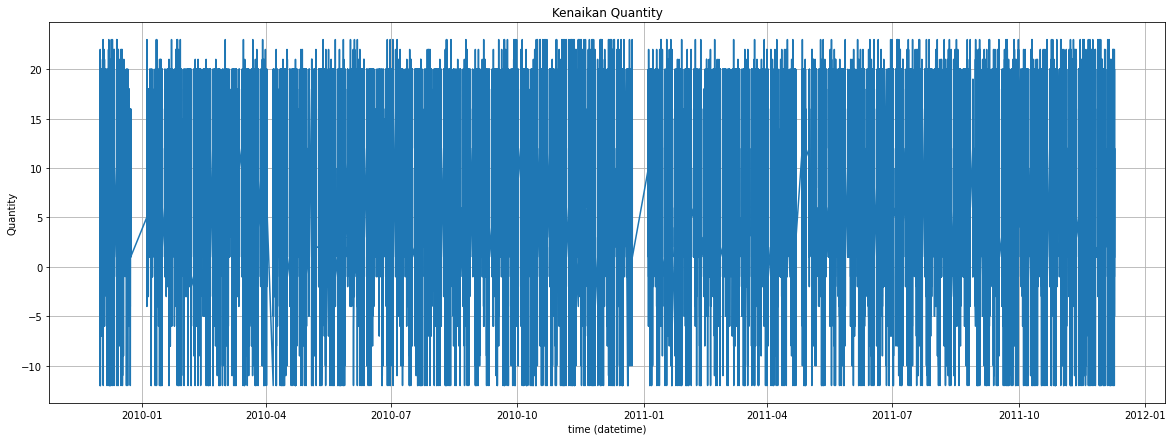

In [24]:
# Plot
x = df_Q_out["date"]
y = df_Q_out["Quantity"]
plt.figure(figsize=(20,7))

plt.plot(x, y)

plt.xlabel('time (datetime)')
plt.ylabel('Quantity')
plt.title('Kenaikan Quantity')
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

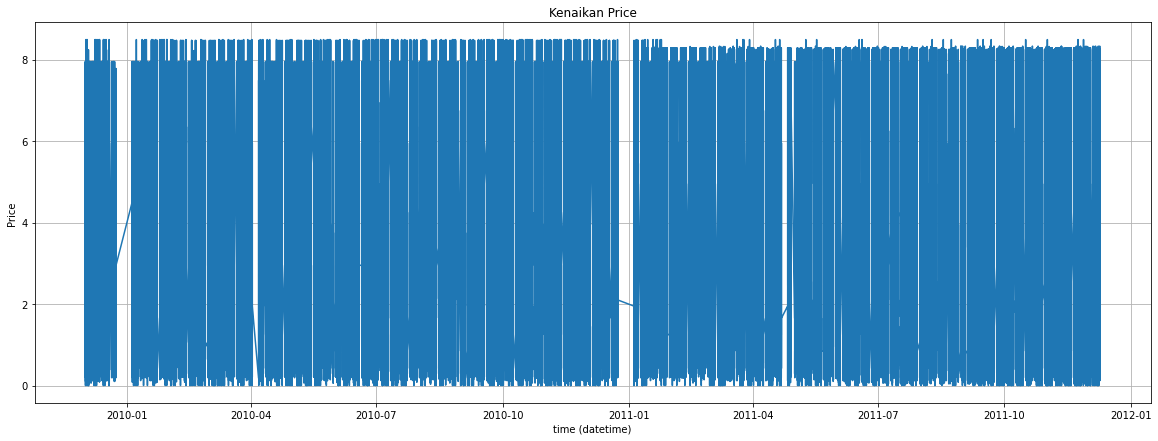

In [25]:
# Plot
x = df_P_out["date"]
y = df_P_out["Price"]
plt.figure(figsize=(20,7))

plt.plot(x, y)

plt.xlabel('time (datetime)')
plt.ylabel('Price')
plt.title('Kenaikan Price')
plt.grid(True)
plt.show